In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.special import softmax

In [2]:
df= pd.read_csv('data/mushrooms.csv')

In [81]:
ddf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
ddf= pd.read_csv('data/mushrooms.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
df.drop(['veil-type'], inplace=True, axis=1)

<AxesSubplot:>

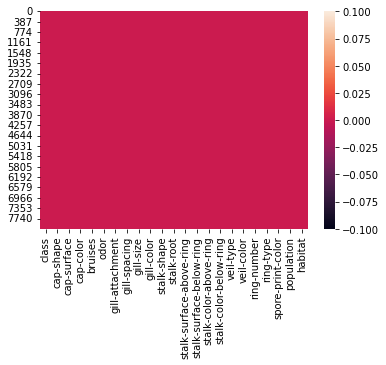

In [6]:
sns.heatmap(ddf.isnull())

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
encoder = LabelEncoder()
scaler = StandardScaler()
ohe = OneHotEncoder()
mms= MinMaxScaler()

In [61]:
for col in range(len(df.columns)):
    df[df.columns[col]] = encoder.fit_transform(df[df.columns[col]])
    

In [62]:
y=df['class']

In [63]:
X=df.iloc[:,1:]

In [64]:
X= pd.DataFrame(mms.fit_transform(X), columns=X.columns)

In [13]:
#V= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.30)

In [19]:
#x_train2, x_test2, y_train2 , y_test2 = train_test_split(V, y, test_size=0.30)

In [11]:
import pickle as pkl
import joblib

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model = GaussianNB()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4=SVC()

In [66]:
dt=model2.fit(x_train, y_train)

In [67]:
rf=model3.fit(x_train, y_train)

In [68]:
svc=model4.fit(x_train, y_train)

In [70]:
ypred2=model2.predict(x_test)

In [71]:
ypred3=model3.predict(x_test)

In [72]:
ypred4=model4.predict(x_test)

In [78]:
with open('suport_vector_machine_model.pkl', 'wb') as file:
    pkl.dump(svc, file)

In [79]:
with open('decision_tree_model.pkl', 'wb') as fil:
    pkl.dump(dt, fil)

In [80]:
with open('random_forest_model.pkl', 'wb') as fi:
    pkl.dump(rf, fi)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
confusion_matrix(y_test, ypred2)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [74]:
confusion_matrix(y_test, ypred3)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [75]:
confusion_matrix(y_test, ypred4)

array([[1256,    1],
       [   0, 1181]], dtype=int64)

In [37]:
print(classification_report(y_test, ypred ))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1278
           1       0.90      0.94      0.92      1160

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [38]:
print(classification_report(y_test, ypred2 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00      1160

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [39]:
model5=joblib.load('random_forest_model.pkl')

In [40]:
ypred5=model5.predict(x_test)

In [77]:
print(classification_report(y_test, ypred4 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [42]:
confusion_matrix(y_test, ypred5)

array([[1278,    0],
       [ 750,  410]], dtype=int64)

In [44]:
y_train

2300    0
424     0
4910    1
7805    1
5760    1
       ..
4090    1
7055    1
5222    1
182     0
3935    1
Name: class, Length: 5686, dtype: int32

In [48]:
df.iloc[2300,0]

0

In [49]:
ddf.iloc[0,0]

'p'

In [50]:
df.iloc[0,0]

1